In [15]:
import numpy as np
import pylab as pl
from sklearn import datasets, svm

iris = datasets.load_iris()  # no standard python: skelearn
X = iris.data
y = iris.target

print(X)
print(y)
# Take only two classes, and take only two feature
X = X[y != 0, :2] 
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float) #cast


X_train = X[:int(.9) * n_sample]
y_train = y[:int(.9 )* n_sample]
X_test = X[int(.9) * n_sample:]
y_test = y[int(.9) * n_sample:]

# fit the model
C = 1.0  # SVM regularization parameter
# for this add the next line in import
from sklearn.model_selection import train_test_split
clf = svm.LinearSVC(C=C).fit(X_train, y_train)

pl.figure('linear')
pl.clf()
 
pl.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=pl.cm.Paired)

# Circle out the test data
pl.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

pl.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
print XX
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
pl.pcolormesh(XX, YY, Z > 0, cmap=pl.cm.Paired)
pl.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
           levels=[-.5, 0, .5])

pl.show()


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

## Question 3

Computing Isomap


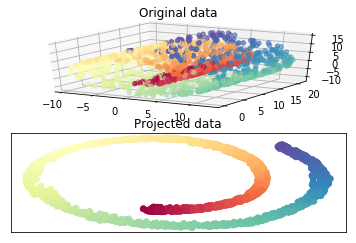

In [6]:
import pylab as pl

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

#----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

#print "Computing LLE embedding"
#X_r, err = manifold.locally_linear_embedding(X, n_neighbors=10,                                              n_components=2)

print "Computing Isomap"
X_r = manifold.Isomap(n_neighbors=100,n_components=2).fit_transform(X)
 
#----------------------------------------------------------------------
# Plot result

fig = pl.figure()
try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(211, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=pl.cm.Spectral)
except:
    ax = fig.add_subplot(211)
    ax.scatter(X[:, 0], X[:, 2], c=color, cmap=pl.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=pl.cm.Spectral)
pl.axis('tight')
pl.xticks([]), pl.yticks([])
pl.title('Projected data')
pl.show()


Computing PCA projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 2.62888e-06


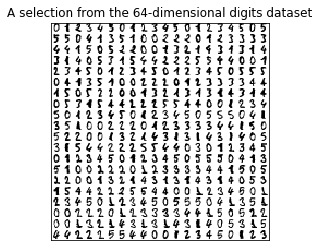

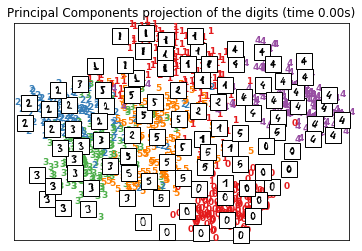

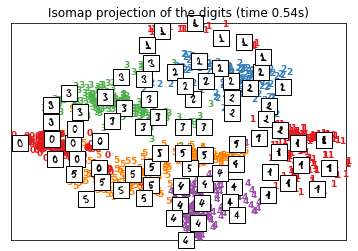

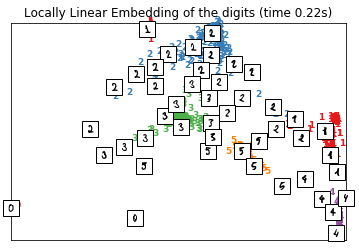

In [2]:
from time import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA as RandomizedPCA
import numpy as np
import pylab as pl
from matplotlib import offsetbox
#from sklearn.utils.fixes import qr_economic
from sklearn import manifold, datasets, decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import euclidean_distances

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 10 # CHANGE THIS


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    pl.figure()
    ax = pl.subplot(111)
    for i in range(X.shape[0]):
        pl.text(X[i, 0], X[i, 1], str(digits.target[i]),
                color=pl.cm.Set1(y[i] / 10.),
                fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=pl.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    pl.xticks([]), pl.yticks([])
    if title is not None:
        pl.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
N = 20
img = np.zeros((10 * N, 10 * N))
for i in range(N):
    ix = 10 * i + 1
    for j in range(N):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * N + j].reshape((8, 8))
pl.imshow(img, cmap=pl.cm.binary)
pl.xticks([])
pl.yticks([])
pl.title('A selection from the 64-dimensional digits dataset')
 
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print "Computing PCA projection"
t0 = time()
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
plot_embedding(X_pca,
    "Principal Components projection of the digits (time %.2fs)" %
    (time() - t0))
 

#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print "Computing Isomap embedding"
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print "Done."
plot_embedding(X_iso,
    "Isomap projection of the digits (time %.2fs)" %
    (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print "Computing LLE embedding"
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print "Done. Reconstruction error: %g" % clf.reconstruction_error_
plot_embedding(X_lle,
    "Locally Linear Embedding of the digits (time %.2fs)" %
    (time() - t0))
 
 
pl.show()
